In [8]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
'''
@Time    :   26/07/2024 21:39:49
@Author  :   Marty 
'''

from IPython import get_ipython
get_ipython().magic('clear')
get_ipython().magic('reset -f')
from IPython.display import display, Markdown

import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 70

import math 
import pandas as pd
import os

/var/folders/gs/p2p59ns16hlgpqv_027665gm0000gn/T/ipykernel_3828/2296526079.py:9: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('clear')
/var/folders/gs/p2p59ns16hlgpqv_027665gm0000gn/T/ipykernel_3828/2296526079.py:10: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -f')


INFO
- La simulazione OF è stata modificata opportunamente in modo da avere il medesimo 
  coefficiente di diffusione corrispondente al 1 in sciantix + con il fission yield 
  relativo allo xenon espresso in moli. 
- Per far tornare questo caso bisogna andare in MainVariables.cpp e avere 1000 step. 
- Gli errori che venivano prima con la versione di sciantix 1.0 erano: 
  SCIANTIX vs HF (end)  = 13.01%

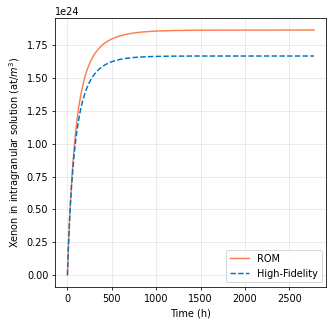

In [9]:
#High Fidelity
high_fidelity=np.loadtxt("volFieldValue.dat")
timeOF=high_fidelity[:,0]/3600 #hour
xeOF=high_fidelity[:,1]*6.022e23

#SCIANTIX with b=0 (constant value) and g=99 (null value)
sciantix = np.loadtxt("Output.txt", skiprows=1)
time=sciantix[:,0]      #hour
xe=sciantix[:,6]        #at/m^3
plt.figure(1, figsize=[5,5])
plt.plot(time,xe,label='ROM', color='#FF7F50', linewidth=1.5)
plt.plot(timeOF,xeOF, '--',label='High-Fidelity', color='#0072bd', linewidth=1.5)
plt.ylabel('Xenon in intragranular solution (at/$m^3$)')
plt.xlabel('Time (h)')
plt.grid(which='both', alpha=0.3)
plt.legend(loc='best')
plt.savefig("Xenon concentration.pdf")

Maximum error between SCIANTIX and HF = 11.856765919830096 (%).


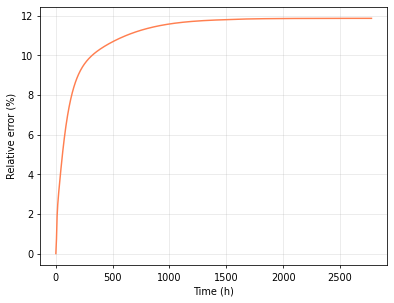

In [10]:
error = np.zeros(np.size(timeOF))
for i in range (1, np.size(timeOF)): 
    error[i]= (abs(xeOF[i]-xe[i])/xeOF[i])*100

plt.plot(figsize=[5,5])
plt.plot(timeOF,error, color='#FF7F50', linewidth=1.5)
plt.grid(which='both', alpha=0.3)
plt.xlabel('Time (h)')
plt.ylabel('Relative error (%)')
plt.savefig("Error.pdf", bbox_inches="tight")

print(F'Maximum error between SCIANTIX and HF = {max(error)} (%).')